

Classificação: Dataset de Risco de Pacientes retornar o cancer

Três tipos possíveis: (classes)
- Alto
- Médio
- Baixo

Foi usado o método de classificação pois este é o ideal quando se trata de categorizar em tipos dado certos valores.




Gênero usado (Nascimento):

- Masculino - 1;
- Feminino - 2;

Nível de Risco:
- Alto
- Médio
- Baixo


Importando as bibliotecas

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import glob
import io

In [4]:
df_cancer = pd.read_csv('./cancerpatientdatasets.csv')

In [5]:
df_cancer

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


Convertendo para DataFrame (Pandas)

Renomeando as colunas 

In [6]:
df_cancer.rename(columns={'Patient Id': 'Id do Paciente', 'Age':'Idade', 'Gender':'Gênero', 
                          'Air Pollution':'Poluição do Ar', 'Alcohol use':'Uso de Álcool', 'Dust Allergy':'Alergia à Poeira', 
                          'OccuPational Hazards':'Riscos Ocupacionais', 'Genetic Risk':'Risco Genêtico', 'chronic Lung Disease':'Doença Pulmonar Crônica', 
                          'Balanced Diet':'Dieta Balanceada', 'Obesity':'Obesidade', 'Smoking':'Fumante',
                          'Passive Smoker':'Fumante Passivo', 'Chest Pain':'Dor no Peito', 'Coughing of Blood':'Tosse com Sangue',
                          'Fatigue':'Fadiga', 'Weight Loss':'Perda de Peso', 'Shortness of Breath':'Falta de Ar',
                          'Wheezing':'Respiração Ofegante', 'Swallowing Difficulty':'Dificulade de Engolir', 'Clubbing of Finger Nails':'Baqueteamento das Unhas',
                          'Frequent Cold':'Calafrios', 'Dry Cough':'Tosse Seca','Snoring':'Ronco', 
                          'Level':'Grau'}, 
                 inplace=True)
df_cancer.replace({'Low':'Baixo', 'Medium':'Médio', 'High':'Alto'}, inplace=True)

In [7]:
df_cancer

,Id do Paciente,Idade,Gênero,Poluição do Ar,Uso de Álcool,Alergia à Poeira,Riscos Ocupacionais,Risco Genêtico,Doença Pulmonar Crônica,Dieta Balanceada,...,Fadiga,Perda de Peso,Falta de Ar,Respiração Ofegante,Dificulade de Engolir,Baqueteamento das Unhas,Calafrios,Tosse Seca,Ronco,Grau
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Baixo
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Médio
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,Alto
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,Alto
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,Alto
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,Alto
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,Alto
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,Alto


Checando valores nulos

In [8]:
df_cancer.isnull().any()

Id do Paciente             False
Idade                      False
Gênero                     False
Poluição do Ar             False
Uso de Álcool              False
Alergia à Poeira           False
Riscos Ocupacionais        False
Risco Genêtico             False
Doença Pulmonar Crônica    False
Dieta Balanceada           False
Obesidade                  False
Fumante                    False
Fumante Passivo            False
Dor no Peito               False
Tosse com Sangue           False
Fadiga                     False
Perda de Peso              False
Falta de Ar                False
Respiração Ofegante        False
Dificulade de Engolir      False
Baqueteamento das Unhas    False
Calafrios                  False
Tosse Seca                 False
Ronco                      False
Grau                       False
dtype: bool

Checando os tipos de dados:

In [9]:
df_cancer.dtypes

Id do Paciente             object
Idade                       int64
Gênero                      int64
Poluição do Ar              int64
Uso de Álcool               int64
Alergia à Poeira            int64
Riscos Ocupacionais         int64
Risco Genêtico              int64
Doença Pulmonar Crônica     int64
Dieta Balanceada            int64
Obesidade                   int64
Fumante                     int64
Fumante Passivo             int64
Dor no Peito                int64
Tosse com Sangue            int64
Fadiga                      int64
Perda de Peso               int64
Falta de Ar                 int64
Respiração Ofegante         int64
Dificulade de Engolir       int64
Baqueteamento das Unhas     int64
Calafrios                   int64
Tosse Seca                  int64
Ronco                       int64
Grau                       object
dtype: object

Sumário dos dados:

In [10]:
df_cancer.describe()

,Idade,Gênero,Poluição do Ar,Uso de Álcool,Alergia à Poeira,Riscos Ocupacionais,Risco Genêtico,Doença Pulmonar Crônica,Dieta Balanceada,Obesidade,...,Tosse com Sangue,Fadiga,Perda de Peso,Falta de Ar,Respiração Ofegante,Dificulade de Engolir,Baqueteamento das Unhas,Calafrios,Tosse Seca,Ronco
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [11]:
df_cancer.corr()

,Idade,Gênero,Poluição do Ar,Uso de Álcool,Alergia à Poeira,Riscos Ocupacionais,Risco Genêtico,Doença Pulmonar Crônica,Dieta Balanceada,Obesidade,...,Tosse com Sangue,Fadiga,Perda de Peso,Falta de Ar,Respiração Ofegante,Dificulade de Engolir,Baqueteamento das Unhas,Calafrios,Tosse Seca,Ronco
Idade,1.000000,-0.202086,0.099494,0.151742,0.035202,0.062177,0.073151,0.128952,0.004863,0.034337,...,0.053006,0.095059,0.106946,0.035329,-0.095354,-0.105833,0.039258,-0.012706,0.012128,-0.004700
Gênero,-0.202086,1.000000,-0.246912,-0.227636,-0.204312,-0.192343,-0.222727,-0.205061,-0.099741,-0.123813,...,-0.146505,-0.116467,-0.057993,-0.045972,-0.076304,-0.058324,-0.034219,-0.000526,-0.123001,-0.181618
Poluição do Ar,0.099494,-0.246912,1.000000,0.747293,0.637503,0.608924,0.705276,0.626701,0.524873,0.601468,...,0.607829,0.211724,0.258016,0.269558,0.055368,-0.080918,0.241065,0.174539,0.261489,-0.021343
Uso de Álcool,0.151742,-0.227636,0.747293,1.000000,0.818644,0.878786,0.877210,0.763576,0.653352,0.669312,...,0.667612,0.237245,0.207851,0.435785,0.180817,-0.114073,0.414992,0.180778,0.211277,0.122694
Alergia à Poeira,0.035202,-0.204312,0.637503,0.818644,1.000000,0.835860,0.787904,0.619556,0.647197,0.700676,...,0.625291,0.332472,0.321756,0.518682,0.304850,0.031141,0.345714,0.219389,0.300195,0.052844
Riscos Ocupacionais,0.062177,-0.192343,0.608924,0.878786,0.835860,1.000000,0.893049,0.858284,0.691509,0.722191,...,0.645947,0.267844,0.176226,0.366482,0.178925,-0.002853,0.366447,0.077166,0.159887,0.022916
Risco Genêtico,0.073151,-0.222727,0.705276,0.877210,0.787904,0.893049,1.000000,0.836231,0.679905,0.729826,...,0.632236,0.230530,0.271743,0.458200,0.204973,-0.062948,0.357815,0.087092,0.194399,-0.056831
Doença Pulmonar Crônica,0.128952,-0.205061,0.626701,0.763576,0.619556,0.858284,0.836231,1.000000,0.622632,0.601754,...,0.602987,0.247697,0.104080,0.182426,0.057214,0.007279,0.298023,0.028759,0.114161,0.043375
Dieta Balanceada,0.004863,-0.099741,0.524873,0.653352,0.647197,0.691509,0.679905,0.622632,1.000000,0.706922,...,0.745054,0.400678,-0.006544,0.343623,0.063930,0.046807,0.041967,0.263931,0.331995,0.152677
Obesidade,0.034337,-0.123813,0.601468,0.669312,0.700676,0.722191,0.729826,0.601754,0.706922,1.000000,...,0.814805,0.552788,0.313495,0.406203,0.094287,0.127213,0.149093,0.288368,0.200618,0.039422


Gerando o histograma dos valores de idade

<AxesSubplot:ylabel='Frequency'>

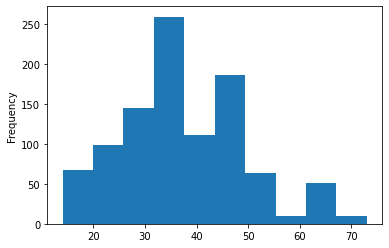

In [12]:
df_cancer['Idade'].plot.hist()

Histograma dos valores de largura da pétala

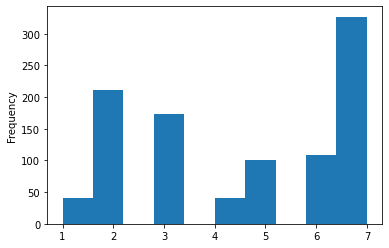

In [13]:
df_cancer['Risco Genêtico'].plot.hist()
plt.show()

Buscando co-relações entre variáveis: PairPlot

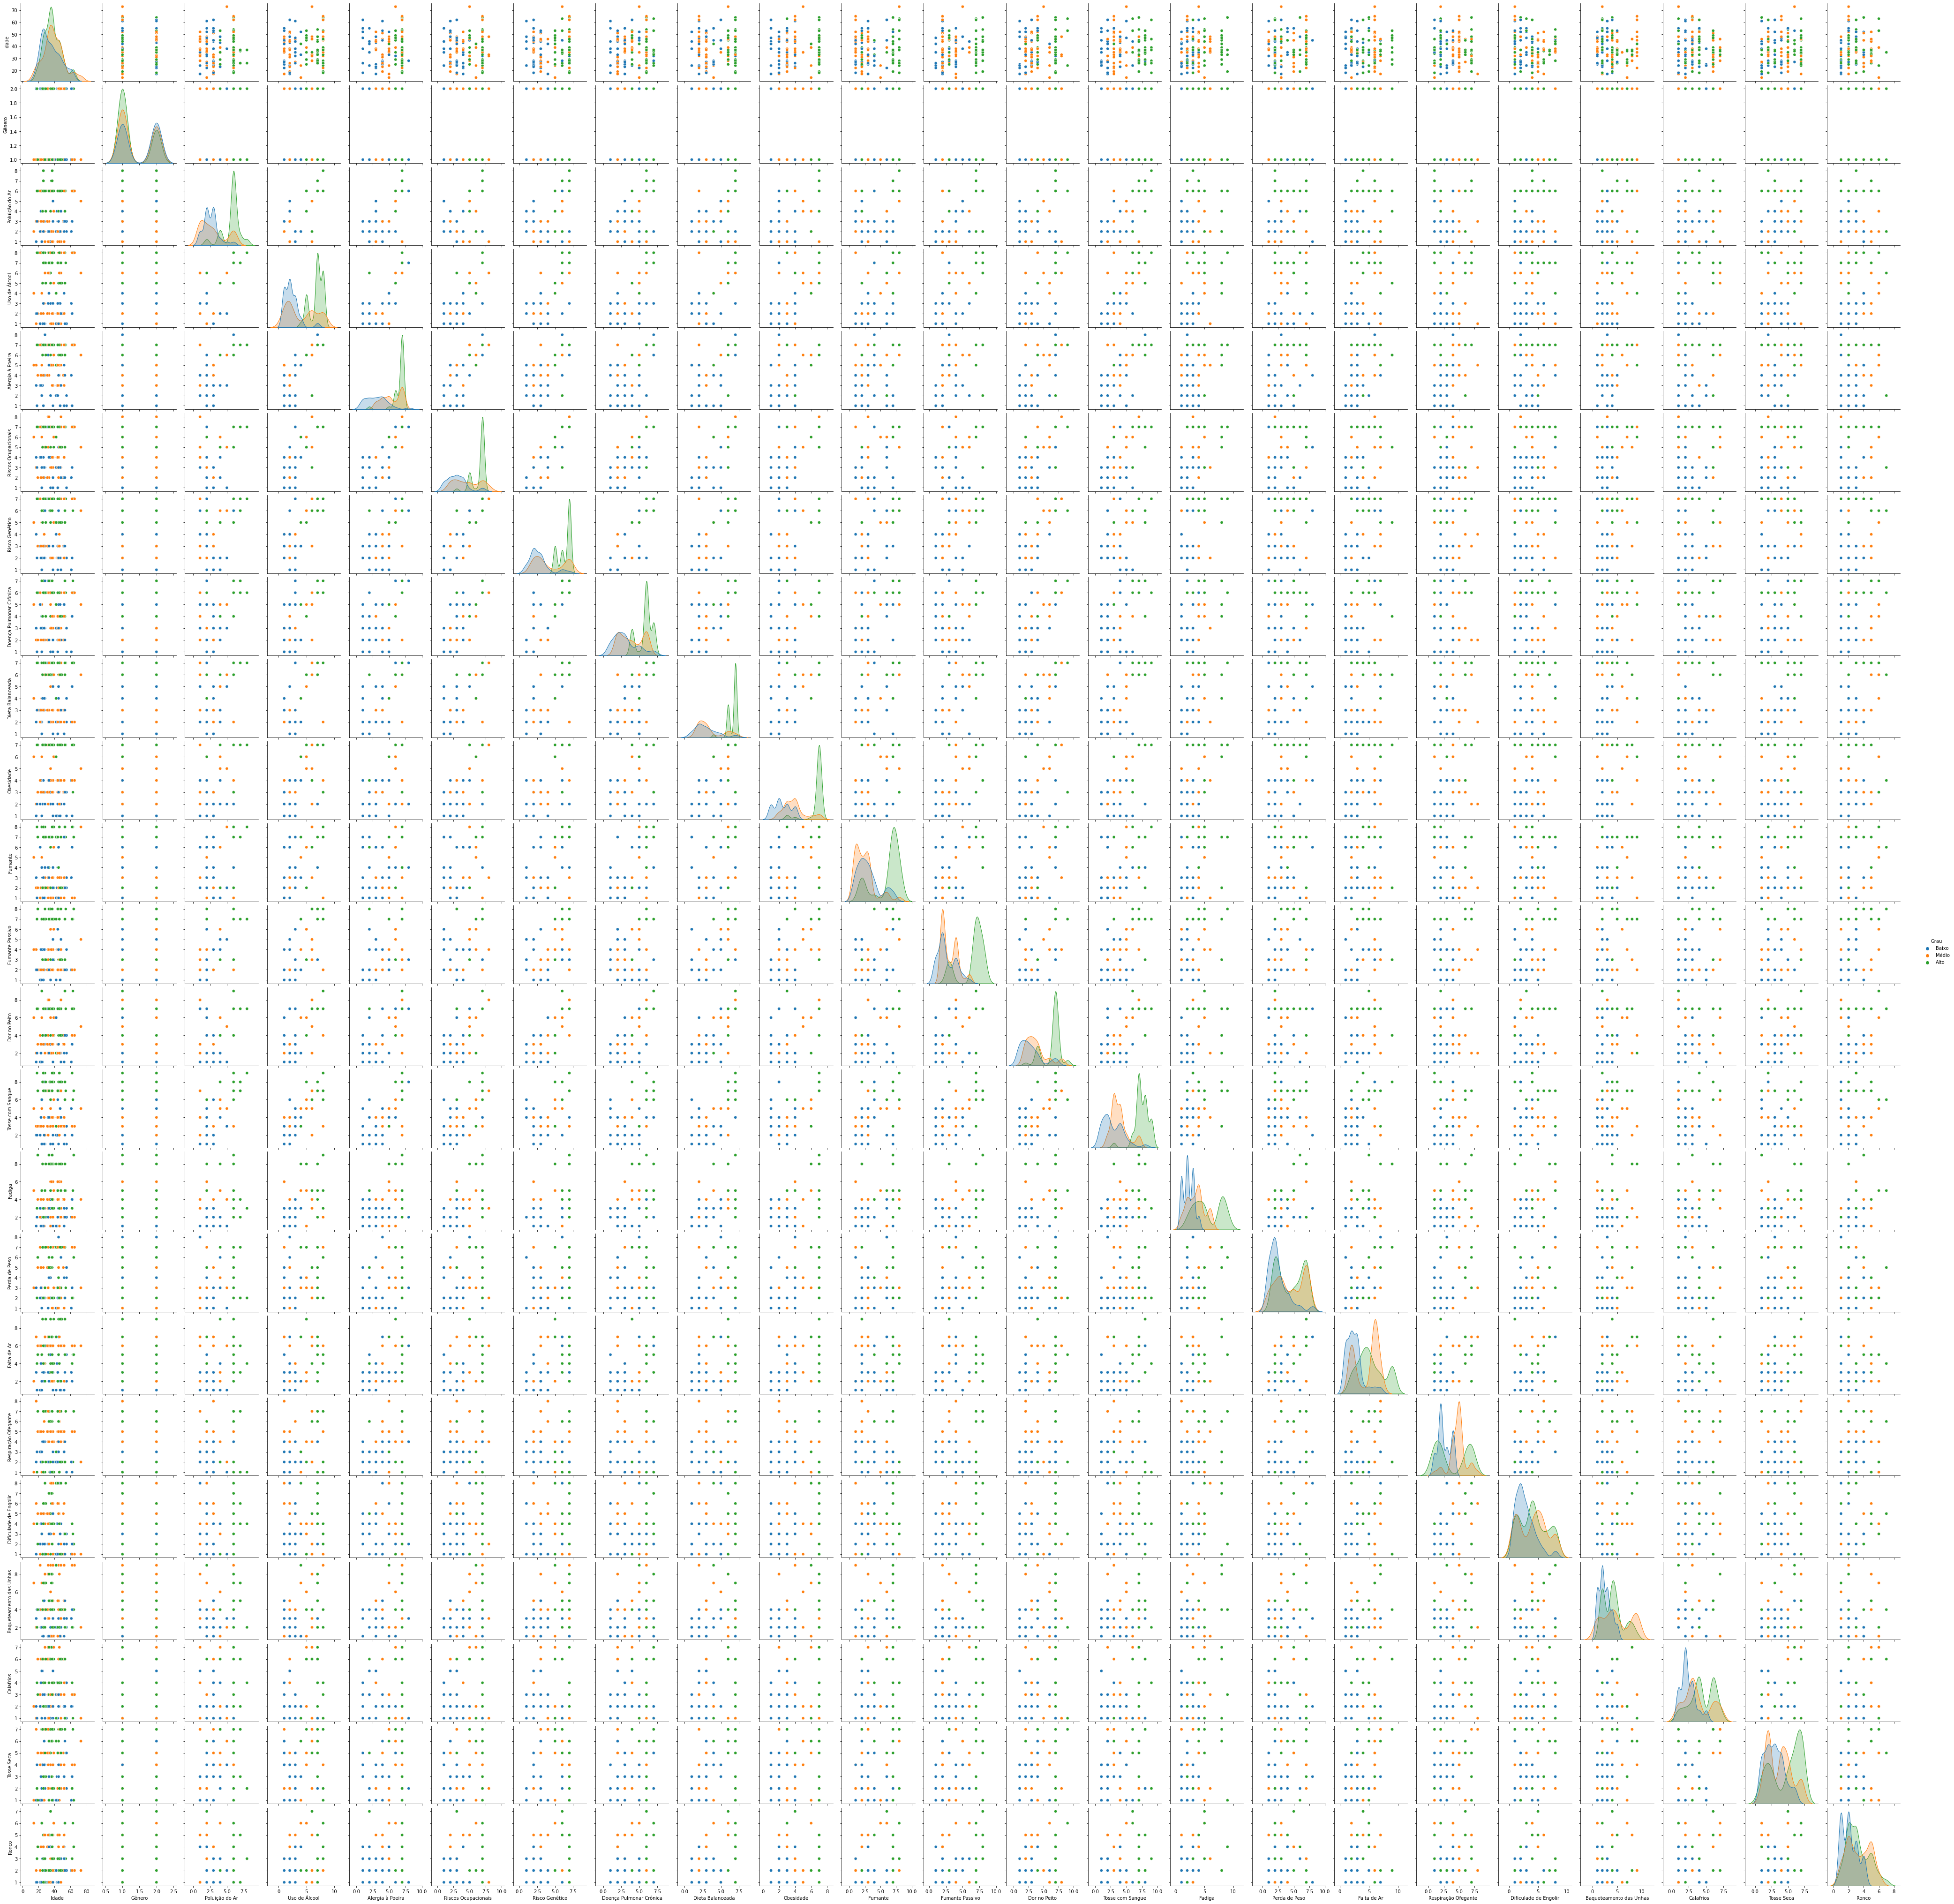

In [14]:
sns.pairplot(df_cancer, hue='Grau')

Analisando a correlação entre os pares:

<AxesSubplot:xlabel='Gênero', ylabel='Idade'>

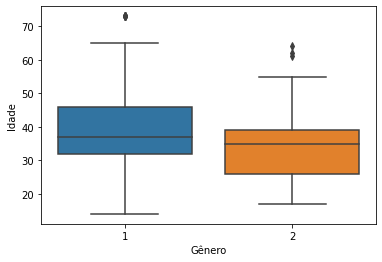

In [15]:
sns.boxplot(data=df_cancer, x="Gênero",y="Idade")

<AxesSubplot:xlabel='Fumante Passivo', ylabel='Idade'>

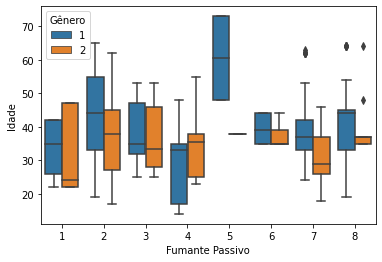

In [16]:
sns.boxplot(data=df_cancer, x="Fumante Passivo",y="Idade", hue="Gênero")

<AxesSubplot:xlabel='Fumante', ylabel='Idade'>

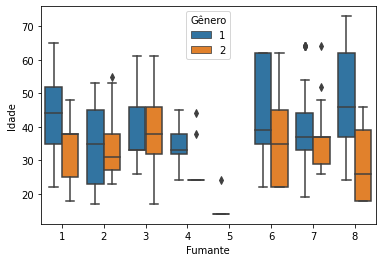

In [17]:
sns.boxplot(data=df_cancer, x="Fumante",y="Idade" ,hue="Gênero")

<AxesSubplot:xlabel='Uso de Álcool', ylabel='Idade'>

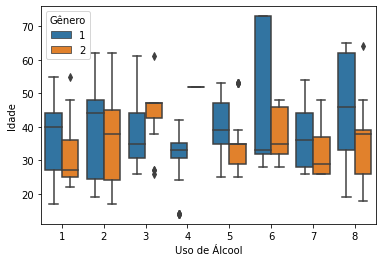

In [18]:
sns.boxplot(data=df_cancer, x="Uso de Álcool",y="Idade" ,hue="Gênero")

<AxesSubplot:xlabel='Risco Genêtico', ylabel='Idade'>

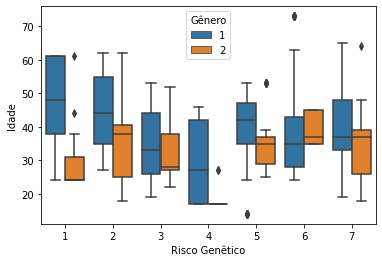

In [19]:
sns.boxplot(data=df_cancer, x="Risco Genêtico",y="Idade", hue="Gênero")

## **SciKit-learn**: Biblioteca em Python para Aprendizado de Máquina

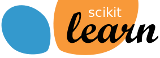



In [20]:
import sklearn.model_selection as model_selection

## Tarefa de classificação usando Árvore de Decisão

Separando o dataset em conjunto de treino e de teste:

In [23]:
features = df_cancer[['Idade', 'Gênero', 'Fumante', 'Uso de Álcool', 'Risco Genêtico']].values
classe = df_cancer['Grau'].values

In [24]:
features = df_cancer[['Idade','Poluição do Ar', 'Gênero', 'Fumante', 'Uso de Álcool', 'Alergia à Poeira','Risco Genêtico','Doença Pulmonar Crônica','Dieta Balanceada',
                      'Obesidade','Fumante Passivo', 'Dor no Peito', 'Tosse com Sangue','Fadiga', 'Perda de Peso', 'Falta de Ar',
                      'Respiração Ofegante', 'Dificulade de Engolir',  'Baqueteamento das Unhas','Calafrios', 'Tosse Seca','Ronco',]].values
classe = df_cancer['Grau'].values

In [30]:
# randomstate 1 garante que o dataset sempre será particionado da mesma forma
(features_treino, features_teste, classe_treino, classe_teste) = model_selection.train_test_split(features, classe, train_size=0.7, random_state=1)

Criando a árvore de decisão

In [37]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

cancer_classificador = DecisionTreeClassifier(criterion='entropy', max_depth=5)

Treinando o modelo:

In [38]:
cancer_classificador.fit(features_treino, classe_treino)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [39]:
novos_exemplos = [[60,2,5,2,7]]   # Mulher 60 anos
novos_exemplos2 = [[25,1,5,7,1]]  # Homem 25 anos
novos_exemplos3 = [[30,2,3,3,5]]  # Mulher 42 anos

# 'Idade', 'Gênero'(1-masc,2-fem), 'Fumante', 'Uso de Álcool'

print(cancer_classificador.predict(novos_exemplos))
print(cancer_classificador.predict(novos_exemplos2))
print(cancer_classificador.predict(novos_exemplos3))

ValueError: X has 5 features, but DecisionTreeClassifier is expecting 22 features as input.

Testando o desempenho do modelo:

In [41]:
cancer_classificador.score(features_teste, classe_teste) # score: Acurácia

1.0

[Text(0.5384615384615384, 0.9166666666666666, 'X[12] <= 5.5\nentropy = 1.582\nsamples = 700\nvalue = [250, 214, 236]'),
 Text(0.38461538461538464, 0.75, 'X[16] <= 4.5\nentropy = 1.129\nsamples = 415\nvalue = [9, 202, 204]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[13] <= 3.5\nentropy = 0.893\nsamples = 258\nvalue = [9, 202, 47]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[18] <= 5.5\nentropy = 0.146\nsamples = 192\nvalue = [0, 188, 4]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 188\nvalue = [0, 188, 0]'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 4\nvalue = [0, 0, 4]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[9] <= 2.5\nentropy = 1.269\nsamples = 66\nvalue = [9, 14, 43]'),
 Text(0.38461538461538464, 0.25, 'entropy = 0.0\nsamples = 14\nvalue = [0, 14, 0]'),
 Text(0.5384615384615384, 0.25, 'X[10] <= 6.0\nentropy = 0.665\nsamples = 52\nvalue = [9, 0, 43]'),
 Text(0.46153846153846156, 0.08333333333333333, 'entropy = 0.0\nsamples

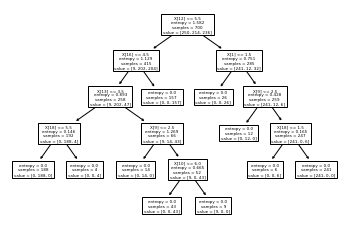

In [42]:
tree.plot_tree(cancer_classificador)

In [43]:
X_test[:100]

NameError: name 'X_test' is not defined

In [44]:
print(cancer_classificador.predict(X_test[:10]))

NameError: name 'X_test' is not defined

In [45]:
classifier.predict(X_test[:10])

NameError: name 'classifier' is not defined

In [46]:
from sklearn.neighbors import KNeighborsClassifier
resultado = KNeighborsClassifier(n_neighbors=5)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,classe, test_size=0.33, random_state=42)
resultado.fit(X_train,y_train)
y_pred = resultado.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Imprimindo a matriz confusa
print("Matriz Confusa: ")
print(confusion_matrix(y_test, y_pred), "\n")  
# Imprimindo o relatório de classificação
print("Relatório de classificação: \n", classification_report(y_test, y_pred)) 
# Imprimindo o quão acurado foi o modelo
print('Acurácia do modelo: ' , accuracy_score(y_test, y_pred))

Matriz Confusa: 
[[128   0   0]
 [  0  95   1]
 [  0   0 106]] 

Relatório de classificação: 
               precision    recall  f1-score   support

        Alto       1.00      1.00      1.00       128
       Baixo       1.00      0.99      0.99        96
       Médio       0.99      1.00      1.00       106

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330

Acurácia do modelo:  0.996969696969697


In [47]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,classe, test_size=0.33, random_state=42)
#cross_val_score(clf, X_train, y_train, cv=10)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Imprimindo a matriz confusa
print("Matriz Confusa: ")
print(confusion_matrix(y_test, y_pred), "\n")  
# Imprimindo o relatório de classificação
print("Relatório de classificação: \n", classification_report(y_test, y_pred)) 
# Imprimindo o quão acurado foi o modelo
print('Acurácia do modelo: ' , accuracy_score(y_test, y_pred))

Matriz Confusa: 
[[128   0   0]
 [  0  96   0]
 [  0   0 106]] 

Relatório de classificação: 
               precision    recall  f1-score   support

        Alto       1.00      1.00      1.00       128
       Baixo       1.00      1.00      1.00        96
       Médio       1.00      1.00      1.00       106

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330

Acurácia do modelo:  1.0
